### Importing Libraries

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\mpremchandu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


#### Reading csv

In [3]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
x=df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7028,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7029,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7030,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [6]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [8]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [9]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [10]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
model_dt.score(x_test,y_test)

0.7867803837953091

In [12]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1024
           1       0.62      0.56      0.59       383

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.78      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [13]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [14]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [15]:
# Train a Decision Trece

In [16]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))
max_depth=6

0.9302721088435374
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       516
           1       0.93      0.94      0.94       660

    accuracy                           0.93      1176
   macro avg       0.93      0.93      0.93      1176
weighted avg       0.93      0.93      0.93      1176



Max Depth: 1, Score: 0.8622448979591837
Max Depth: 2, Score: 0.9005102040816326
Max Depth: 3, Score: 0.9064625850340136
Max Depth: 4, Score: 0.9175170068027211
Max Depth: 5, Score: 0.91921768707483
Max Depth: 6, Score: 0.9302721088435374
Max Depth: 7, Score: 0.9404761904761905
Max Depth: 8, Score: 0.939625850340136
Max Depth: 9, Score: 0.9370748299319728
Max Depth: 10, Score: 0.9438775510204082


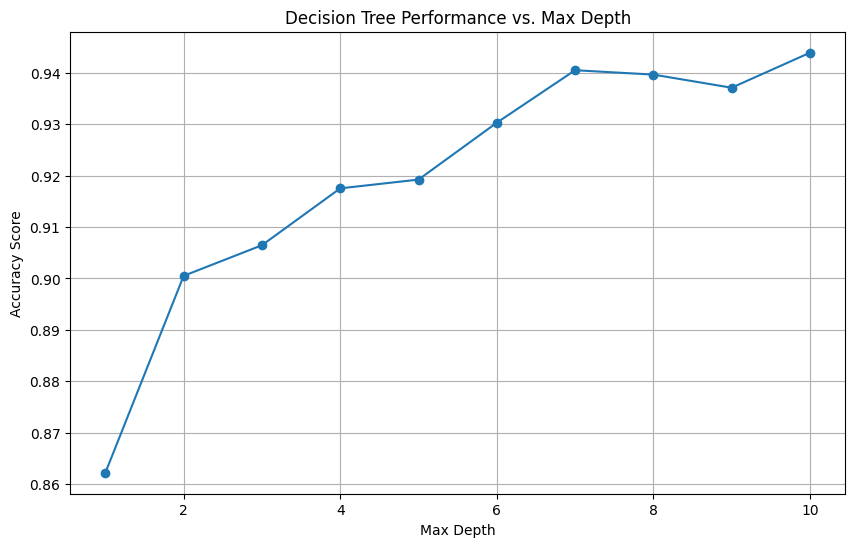

In [17]:
import matplotlib.pyplot as plt

# Initialize lists to store results
max_depth_values = []
model_scores = []

# Vary max_depth and evaluate the model for each value
for max_depth in range(1, 11):  # You can adjust the range as needed
    model_dt_smote = DecisionTreeClassifier(max_depth=max_depth)
    model_dt_smote.fit(xr_train, yr_train)
    yr_predict = model_dt_smote.predict(xr_test)
    model_score_r = model_dt_smote.score(xr_test, yr_test)
    
    # Append values to the lists
    max_depth_values.append(max_depth)
    model_scores.append(model_score_r)

    print(f"Max Depth: {max_depth}, Score: {model_score_r}")

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, model_scores, marker='o', linestyle='-')
plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)

# Show the plot
plt.show()

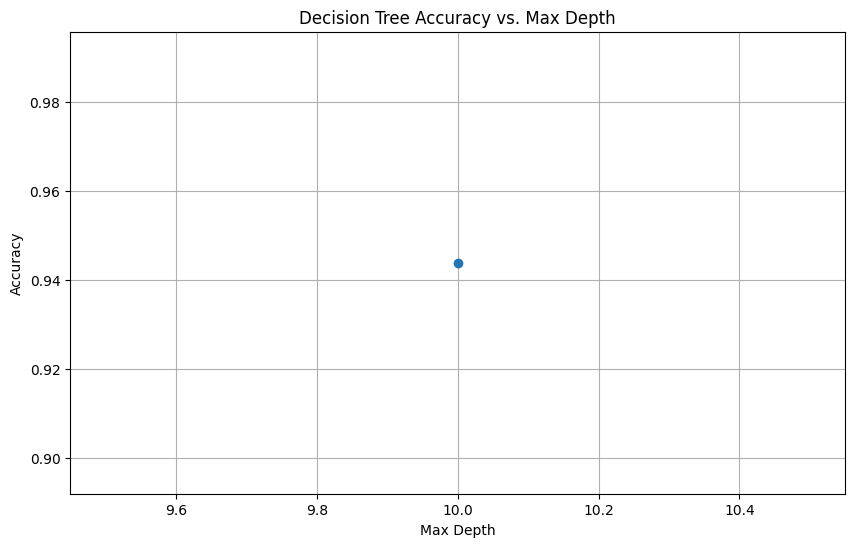

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth, model_score_r, marker='o', linestyle='-')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

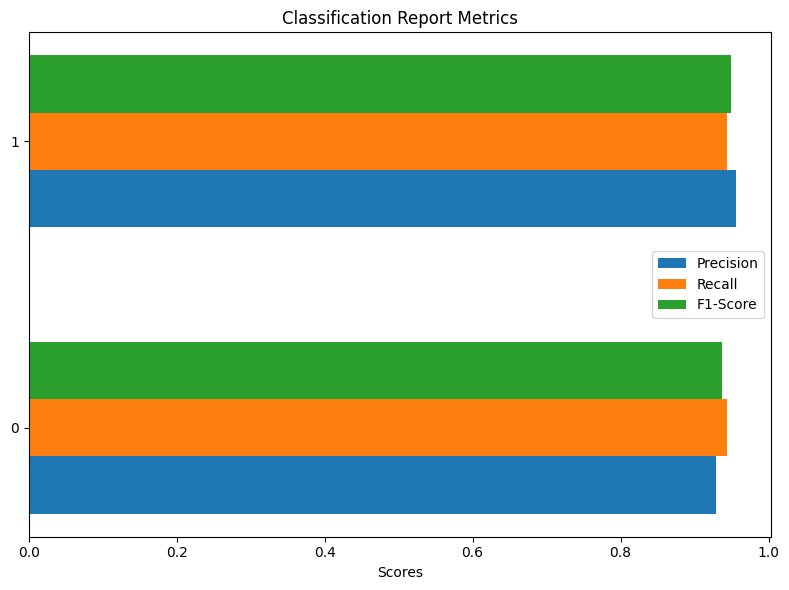

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming you've already calculated the classification report
report = classification_report(yr_test, yr_predict, output_dict=True)

# Extract the metrics for each class
class_names = [str(class_label) for class_label in report.keys() if class_label.isnumeric()]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a horizontal bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

y_pos = np.arange(len(class_names))
width = 0.2

ax.barh(y_pos - width, precision, width, label='Precision')
ax.barh(y_pos, recall, width, label='Recall')
ax.barh(y_pos + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_yticks(y_pos)
ax.set_yticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()


In [20]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[487  29]
 [ 37 623]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [23]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [24]:
y_pred=model_rf.predict(x_test)

In [25]:
model_rf.score(x_test,y_test)

0.8052594171997157

In [26]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1024
           1       0.70      0.49      0.58       383

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.79      0.81      0.79      1407



In [27]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

In [28]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [29]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [30]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [31]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [32]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [33]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9395229982964225
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       547
           1       0.92      0.97      0.94       627

    accuracy                           0.94      1174
   macro avg       0.94      0.94      0.94      1174
weighted avg       0.94      0.94      0.94      1174



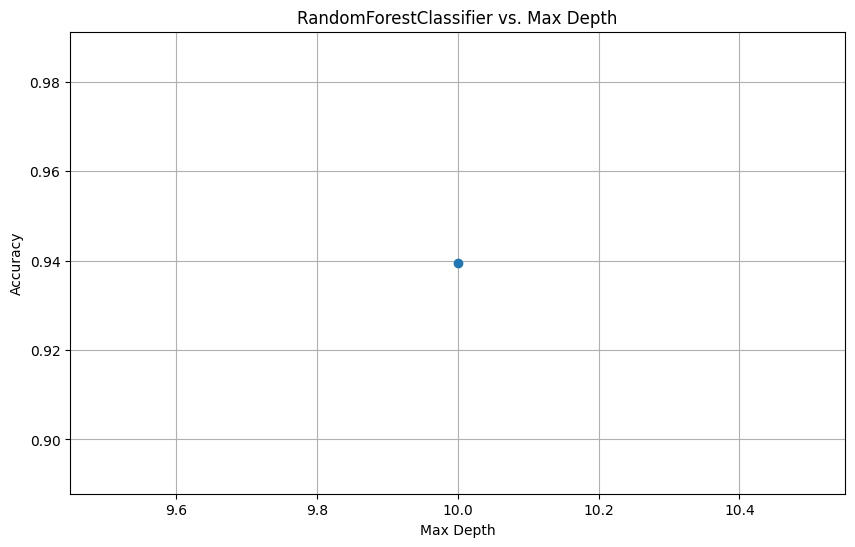

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth, model_score_r1, marker='o', linestyle='-')
plt.title('RandomForestClassifier vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

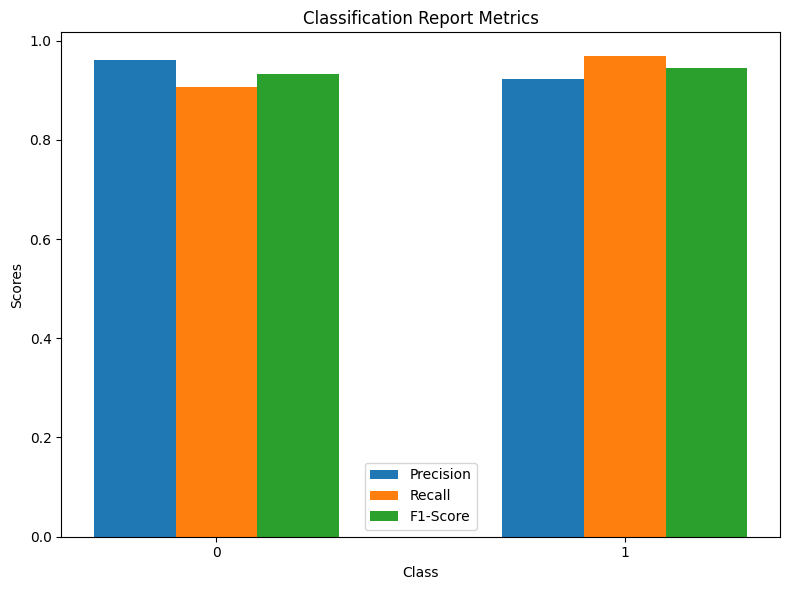

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming you already have the model predictions and true labels
yr_predict1 = model_rf_smote.predict(xr_test1)
yr_test1 = yr_test1  # Assuming you have yr_test1 with true labels

# Get the classification report
report = classification_report(yr_test1, yr_predict1, output_dict=True)

# Extract the metrics for each class
class_names = [str(i) for i in report.keys() if i.isnumeric()]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(class_names))
width = 0.2

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()

Max Depth: 1, Score: 0.8858603066439523
Max Depth: 2, Score: 0.8977853492333902
Max Depth: 3, Score: 0.9088586030664395
Max Depth: 4, Score: 0.9258943781942078
Max Depth: 5, Score: 0.9369676320272572
Max Depth: 6, Score: 0.9395229982964225
Max Depth: 7, Score: 0.948892674616695
Max Depth: 8, Score: 0.9531516183986372
Max Depth: 9, Score: 0.9565587734241908
Max Depth: 10, Score: 0.9582623509369677


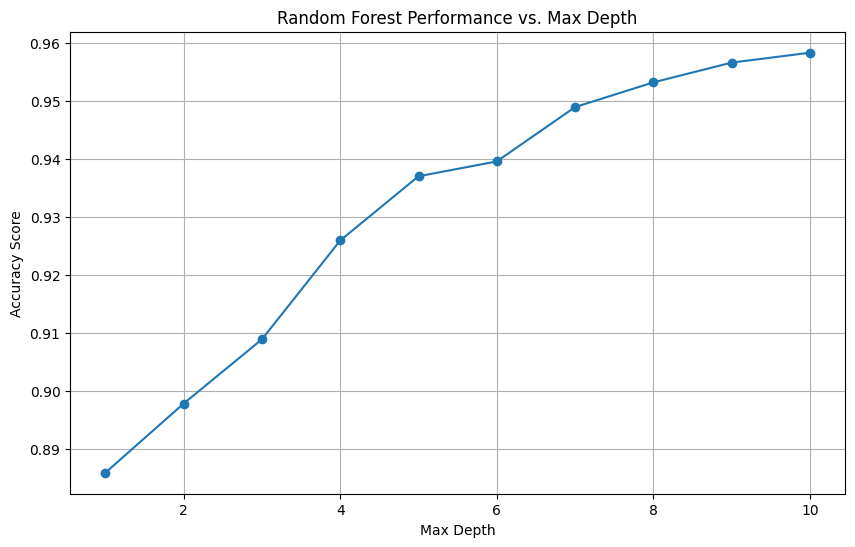

In [36]:
import matplotlib.pyplot as plt

# Initialize lists to store results
max_depth_values = []
model_scores = []

# Vary max_depth and evaluate the model for each value
for max_depth in range(1, 11):  # You can adjust the range as needed
    model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=max_depth, min_samples_leaf=8)
    model_rf_smote.fit(xr_train1, yr_train1)
    yr_predict1 = model_rf_smote.predict(xr_test1)
    model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
    
    # Append values to the lists
    max_depth_values.append(max_depth)
    model_scores.append(model_score_r1)

    print(f"Max Depth: {max_depth}, Score: {model_score_r1}")

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, model_scores, marker='o', linestyle='-')
plt.title('Random Forest Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)

# Show the plot
plt.show()


In [37]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[511  36]
 [ 13 614]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

###### We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

Knn

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Create and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

C:\Users\mpremchandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Make predictions on the test data
y_pred_lr = model_lr.predict(x_test)

In [41]:
# Evaluate the Logistic Regression model
accuracy_lr = model_lr.score(x_test, y_test)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.8166311300639659


In [42]:
# Print the classification report
print(classification_report(y_test, y_pred_lr, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1024
           1       0.69      0.60      0.64       383

    accuracy                           0.82      1407
   macro avg       0.77      0.75      0.76      1407
weighted avg       0.81      0.82      0.81      1407



In [43]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x_train, y_train)

In [44]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [45]:
# Create and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(xr_train2, yr_train2)

C:\Users\mpremchandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
yr_predict2 = model_rf_smote.predict(xr_test2)

In [47]:
model_score_r2 = model_rf_smote.score(xr_test2, yr_test2)

In [48]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))

0.9373007438894793
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       426
           1       0.93      0.96      0.94       515

    accuracy                           0.94       941
   macro avg       0.94      0.94      0.94       941
weighted avg       0.94      0.94      0.94       941



Max Depth: 1, Score: 0.8767268862911796
Max Depth: 2, Score: 0.8862911795961743
Max Depth: 3, Score: 0.8926673751328374
Max Depth: 4, Score: 0.8990435706695006
Max Depth: 5, Score: 0.9171094580233794
Max Depth: 6, Score: 0.922422954303932
Max Depth: 7, Score: 0.922422954303932
Max Depth: 8, Score: 0.9287991498405951
Max Depth: 9, Score: 0.9287991498405951
Max Depth: 10, Score: 0.9298618490967057


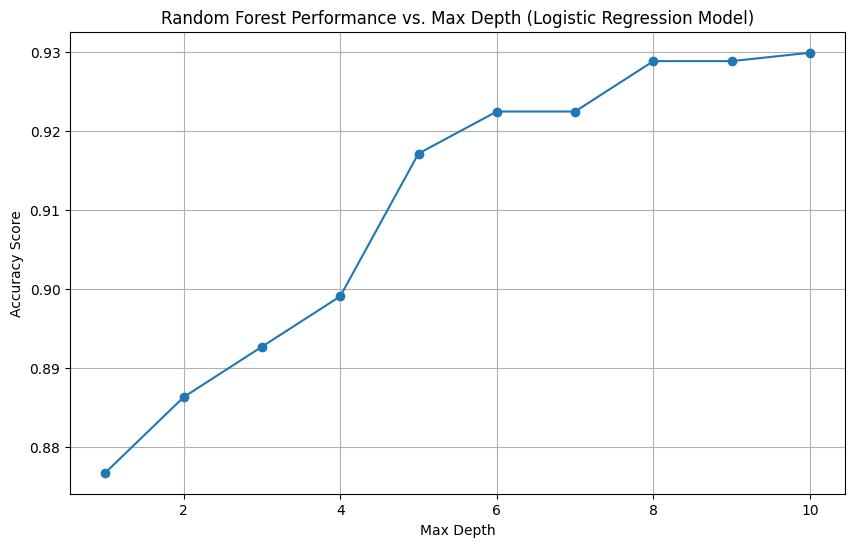

In [49]:
import matplotlib.pyplot as plt

# Initialize lists to store results
max_depth_values = []
model_scores = []

# Vary max_depth and evaluate the model for each value
for max_depth in range(1, 11):  # You can adjust the range as needed
    model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=max_depth, min_samples_leaf=8)
    model_rf_smote.fit(xr_train2, yr_train2)
    yr_predict2 = model_rf_smote.predict(xr_test2)
    model_score_r2 = model_rf_smote.score(xr_test2, yr_test2)
    
    # Append values to the lists
    max_depth_values.append(max_depth)
    model_scores.append(model_score_r2)

    print(f"Max Depth: {max_depth}, Score: {model_score_r2}")

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, model_scores, marker='o', linestyle='-')
plt.title('Random Forest Performance vs. Max Depth (Logistic Regression Model)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)

# Show the plot
plt.show()


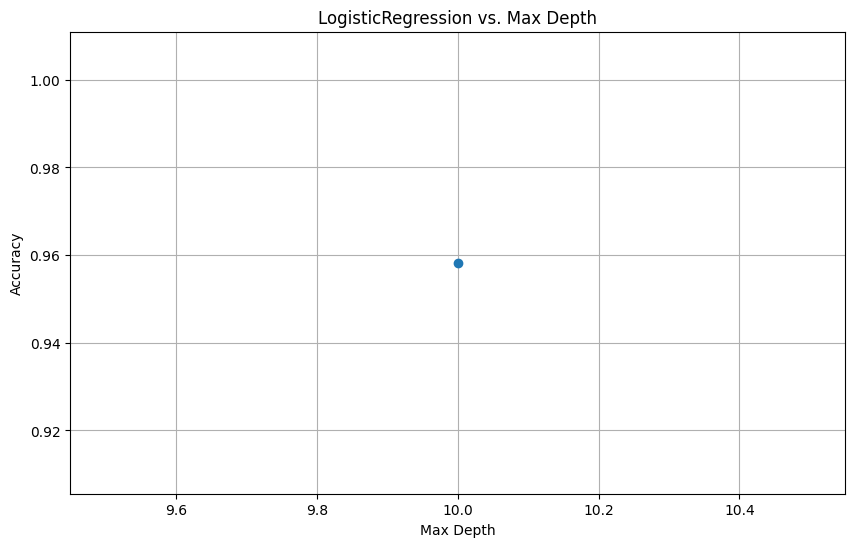

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth, model_score_r1, marker='o', linestyle='-')
plt.title('LogisticRegression vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

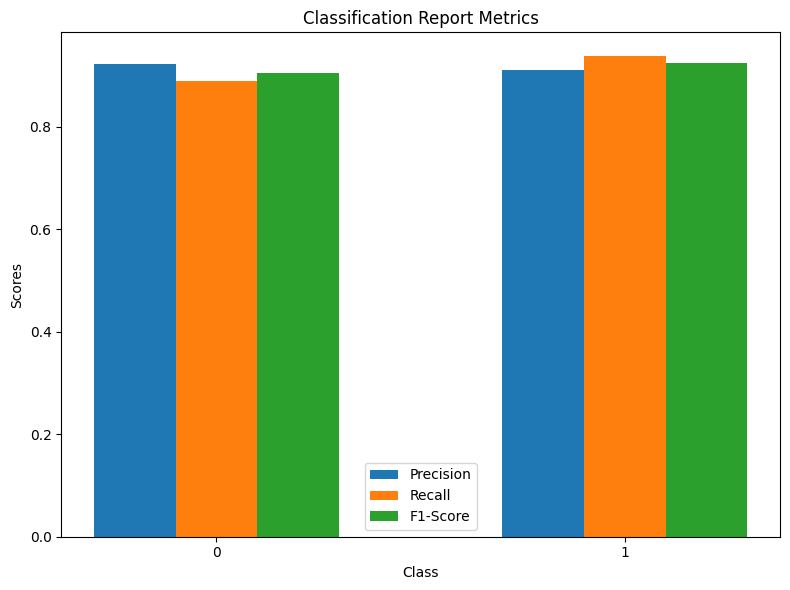

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming you already have the model predictions and true labels
yr_predict2 = model_lr.predict(xr_test2)
yr_test2 = yr_test2  # Assuming you have yr_test2 with true labels

# Get the classification report
report = classification_report(yr_test2, yr_predict2, output_dict=True)

# Extract the metrics for each class
class_names = [str(i) for i in report.keys() if i.isnumeric()]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(class_names))
width = 0.2

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()

In [52]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[487  29]
 [ 37 623]]


Knn

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors (n_neighbors) as needed
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [54]:
# Make predictions on the test data
y_pred_knn = model_knn.predict(x_test)

In [55]:
# Evaluate the KNN model
accuracy_knn = model_knn.score(x_test, y_test)
print("KNN Classifier Accuracy:", accuracy_knn)

KNN Classifier Accuracy: 0.7746979388770433


In [56]:
# Print the classification report
print(classification_report(y_test, y_pred_knn, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1024
           1       0.62      0.43      0.51       383

    accuracy                           0.77      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [57]:
sm = SMOTEENN()
X_resampled3, y_resampled3 = sm.fit_resample(x_train, y_train)

In [58]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled3, y_resampled3,test_size=0.2)

In [59]:
# Create and train the Logistic Regression model
x
cv_scores=[]
k_values=range(1,30)
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xr_train3, yr_train3, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d." % optimal_k)

The optimal number of neighbors is 1.


In [60]:
model_knn = KNeighborsClassifier(n_neighbors=optimal_k)  # You can adjust the number of neighbors (n_neighbors) as needed
model_knn.fit(xr_train3, yr_train3)

KNeighborsClassifier(n_neighbors=1)

In [61]:
xr_train3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [62]:
yr_predict3 = model_rf_smote.predict(xr_test3)

In [63]:
model_score_r3 = model_rf_smote.score(xr_test3, yr_test3)
print(model_score_r3)

0.9515279241306639


In [64]:
print(metrics.classification_report(yr_test3, yr_predict3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       401
           1       0.96      0.96      0.96       548

    accuracy                           0.95       949
   macro avg       0.95      0.95      0.95       949
weighted avg       0.95      0.95      0.95       949



Number of Neighbors: 1, Score: 0.9905163329820864
Number of Neighbors: 2, Score: 0.9852476290832455
Number of Neighbors: 3, Score: 0.9726027397260274
Number of Neighbors: 4, Score: 0.9652265542676501
Number of Neighbors: 5, Score: 0.958904109589041
Number of Neighbors: 6, Score: 0.9546891464699684
Number of Neighbors: 7, Score: 0.9367755532139094
Number of Neighbors: 8, Score: 0.9409905163329821
Number of Neighbors: 9, Score: 0.9388830347734457
Number of Neighbors: 10, Score: 0.934668071654373
Number of Neighbors: 11, Score: 0.9293993677555321
Number of Neighbors: 12, Score: 0.9272918861959958
Number of Neighbors: 13, Score: 0.9188619599578504
Number of Neighbors: 14, Score: 0.9251844046364595
Number of Neighbors: 15, Score: 0.916754478398314
Number of Neighbors: 16, Score: 0.9135932560590094
Number of Neighbors: 17, Score: 0.9114857744994731
Number of Neighbors: 18, Score: 0.9093782929399368
Number of Neighbors: 19, Score: 0.9083245521601686
Number of Neighbors: 20, Score: 0.900948366

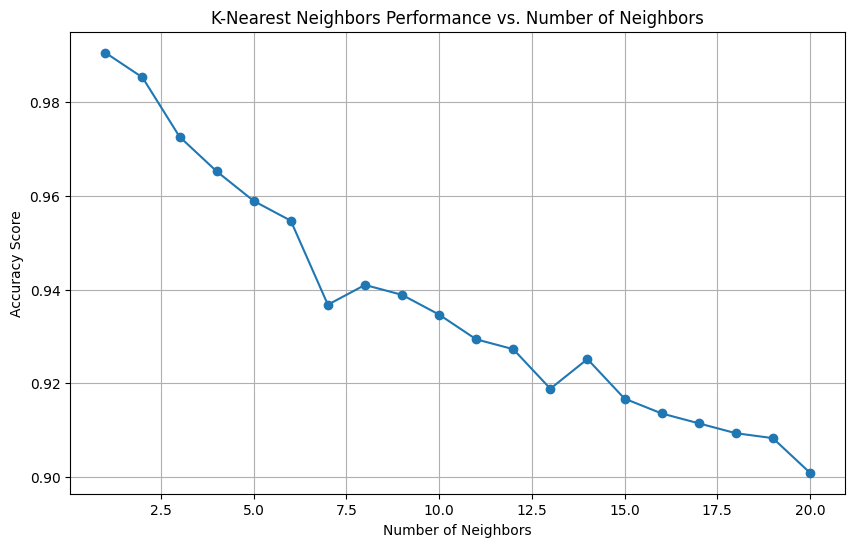

In [65]:
import matplotlib.pyplot as plt

# Initialize lists to store results
n_neighbors_values = []
model_scores = []

# Vary the number of neighbors (n_neighbors) and evaluate the KNN model for each value
for n_neighbors in range(1, 21):  # You can adjust the range as needed
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_knn.fit(xr_train3, yr_train3)
    yr_predict3 = model_knn.predict(xr_test3)
    model_score_r3 = model_knn.score(xr_test3, yr_test3)
    
    # Append values to the lists
    n_neighbors_values.append(n_neighbors)
    model_scores.append(model_score_r3)

    print(f"Number of Neighbors: {n_neighbors}, Score: {model_score_r3}")

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, model_scores, marker='o', linestyle='-')
plt.title('K-Nearest Neighbors Performance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.grid(True)

# Show the plot
plt.show()


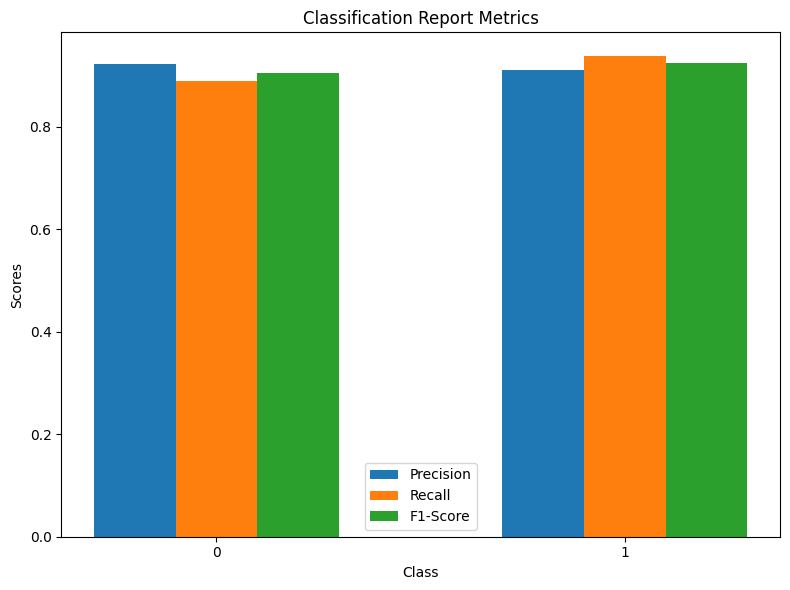

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming you already have the model predictions and true labels
yr_predict2 = model_lr.predict(xr_test2)
yr_test2 = yr_test2  # Assuming you have yr_test2 with true labels

# Get the classification report
report = classification_report(yr_test2, yr_predict2, output_dict=True)

# Extract the metrics for each class
class_names = [str(class_label) for class_label in report.keys() if class_label.isnumeric()]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(class_names))
width = 0.2

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()


navies bais

In [67]:
# Create and train the Gaussian Naive Bayes classifier
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [68]:
# Make predictions on the test data
y_pred_nb = model_nb.predict(x_test)

In [69]:
# Evaluate the Naive Bayes model
accuracy_nb = model_nb.score(x_test, y_test)
print("Naive Bayes Classifier Accuracy:", accuracy_nb)

Naive Bayes Classifier Accuracy: 0.7704335465529495


In [70]:
# Print the classification report
print(classification_report(y_test, y_pred_nb, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1024
           1       0.56      0.78      0.65       383

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.81      0.77      0.78      1407



In [71]:
sm = SMOTEENN()
X_resampled5, y_resampled5 = sm.fit_resample(x_train, y_train)

In [72]:
xr_train5,xr_test5,yr_train5,yr_test5=train_test_split(X_resampled5, y_resampled5,test_size=0.2)

In [73]:
# Create and train the Gaussian Naive Bayes classifier
model_nb = GaussianNB()
model_nb.fit(xr_train5, yr_train5)

GaussianNB()

In [74]:
# Make predictions on the test data
y_pred_nb = model_nb.predict(xr_test5)

In [75]:
# Evaluate the Naive Bayes model
accuracy_nb = model_nb.score(xr_test5, yr_test5)
print("Naive Bayes Classifier Accuracy:", accuracy_nb)

Naive Bayes Classifier Accuracy: 0.8856837606837606


In [76]:
len(y_pred_nb)

936

In [77]:
# Print the classification report
print(classification_report(yr_test5, y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       428
           1       0.88      0.91      0.90       508

    accuracy                           0.89       936
   macro avg       0.89      0.88      0.88       936
weighted avg       0.89      0.89      0.89       936



Run 1 - Accuracy: 0.9038461538461539
Run 2 - Accuracy: 0.8910256410256411
Run 3 - Accuracy: 0.8920940170940171
Run 4 - Accuracy: 0.8856837606837606
Run 5 - Accuracy: 0.8963675213675214
Run 6 - Accuracy: 0.8920940170940171
Run 7 - Accuracy: 0.8856837606837606
Run 8 - Accuracy: 0.8920940170940171
Run 9 - Accuracy: 0.9027777777777778
Run 10 - Accuracy: 0.8899572649572649


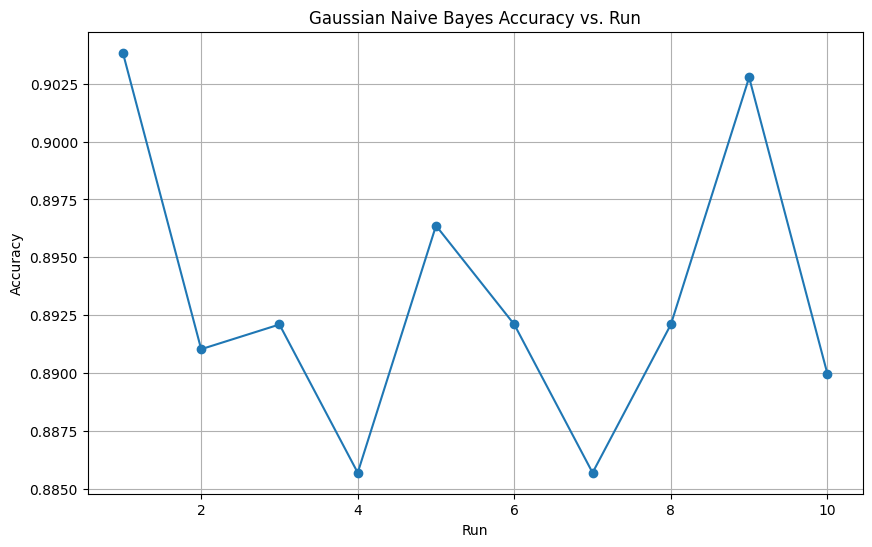

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to store results
num_runs = 10  # You can adjust the number of runs
accuracy_scores = []

for _ in range(num_runs):
    # Split the data with a random test size (e.g., 20%)
    xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled5, y_resampled5, test_size=0.2, random_state=np.random.randint(1, 1000))

    # Create and train the Gaussian Naive Bayes classifier
    model_nb = GaussianNB()
    model_nb.fit(xr_train, yr_train)

    # Make predictions on the test data
    y_pred_nb = model_nb.predict(xr_test)

    # Evaluate the Naive Bayes model and store the accuracy
    accuracy_nb = accuracy_score(yr_test, y_pred_nb)
    accuracy_scores.append(accuracy_nb)

    print(f"Run {len(accuracy_scores)} - Accuracy: {accuracy_nb}")

# Create a line plot for accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_runs + 1), accuracy_scores, marker='o', linestyle='-')
plt.title('Gaussian Naive Bayes Accuracy vs. Run')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.grid(True)

# Show the plot
plt.show()


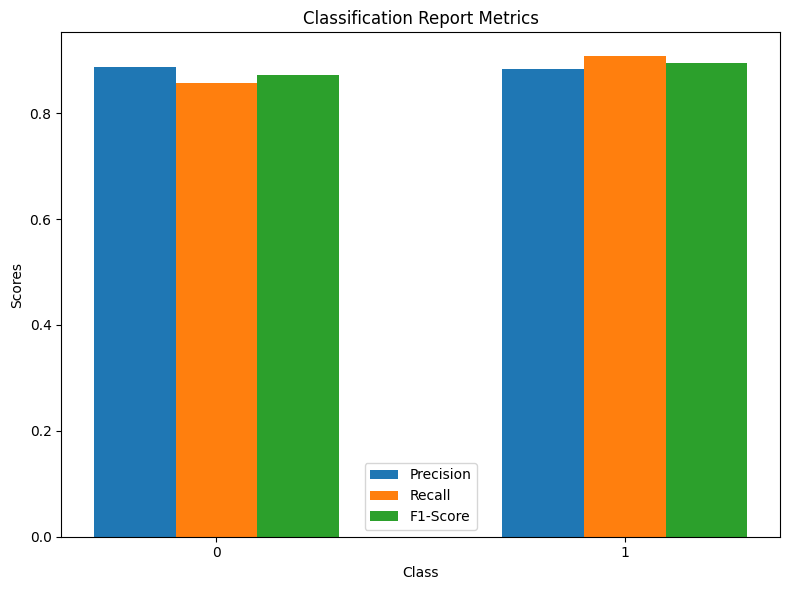

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming you already have the model predictions and true labels
y_pred_nb = model_nb.predict(xr_test5)
yr_test5 = yr_test5  # Assuming you have yr_test5 with true labels

# Get the classification report
report = classification_report(yr_test5, y_pred_nb, output_dict=True)

# Extract the metrics for each class
class_names = [str(class_label) for class_label in report.keys() if class_label.isnumeric()]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(class_names))
width = 0.2

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()


SVM

In [80]:
# Create and train the SVM classifier
model_svm = SVC(kernel='linear', random_state=100)
model_svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=100)

In [81]:
y_pred_svm = model_svm.predict(x_test)

In [82]:
# Evaluate the SVM model
accuracy_svm = model_svm.score(x_test, y_test)
print("SVM Classifier Accuracy:", accuracy_svm)

SVM Classifier Accuracy: 0.7860696517412935


In [83]:
# Print the classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1024
           1       0.66      0.43      0.52       383

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



In [84]:
sm = SMOTEENN()
X_resampled4, y_resampled4 = sm.fit_resample(x_train, y_train)

In [85]:
xr_train4,xr_test4,yr_train4,yr_test4=train_test_split(X_resampled4, y_resampled4,test_size=0.2)

In [86]:
# Create and train the SVM classifier
model_svm = SVC(kernel='linear', random_state=100)
model_svm.fit(xr_train4, yr_train4)

SVC(kernel='linear', random_state=100)

In [87]:
y_pred_svm = model_svm.predict(xr_test4)

In [88]:
# Evaluate the SVM model
accuracy_svm = model_svm.score(xr_test4, yr_test4)
print("SVM Classifier Accuracy:", accuracy_svm)

SVM Classifier Accuracy: 0.9302575107296137


In [89]:
# Print the classification report
print(classification_report(yr_test4, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       414
           1       0.93      0.94      0.94       518

    accuracy                           0.93       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.93      0.93       932



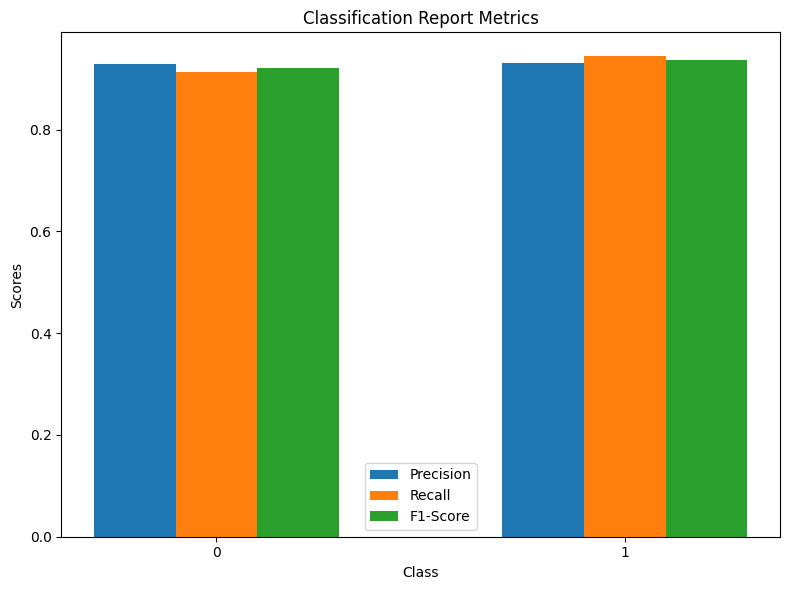

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming you already have the model predictions and true labels
y_pred_svm = model_svm.predict(xr_test4)
yr_test4 = yr_test4  # Assuming you have yr_test4 with true labels

# Get the classification report
report = classification_report(yr_test4, y_pred_svm, output_dict=True)

# Extract the metrics for each class
class_names = [str(class_label) for class_label in report.keys() if class_label.isnumeric()]
precision = [report[class_name]['precision'] for class_name in class_names]
recall = [report[class_name]['recall'] for class_name in class_names]
f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(class_names))
width = 0.2

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
plt.tight_layout()
plt.show()
